In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Y Dataset')

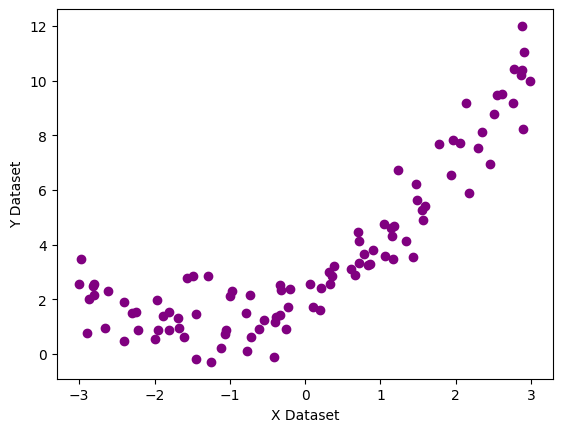

In [4]:
X = 6 * np.random.rand(100, 1) - 3  # 100 rows 1 column, by default it generates the value between 0 and 1 so multiply by 6 gives us range from 0 to 6 and then -3 gives us both positive and negative value, if generated value was 2 after multiplying by 6 then -3 will make it negative
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)    # quadratic equation y=0.5^2+1.5x+2
plt.scatter(X, y, color="purple")
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression() #standardization is not necessary
regression_1.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
print(score)

0.6657363092386906


### lets visualzie the model

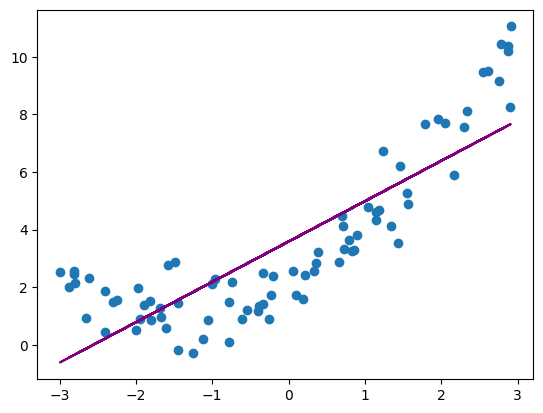

In [28]:
plt.plot(X_train, regression_1.predict(X_train), color="purple")
plt.scatter(X_train, y_train)

## Lets apply polynomial transformation

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)  # if include_bias=True then a column of 1 will be added as first feature in matrix
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly) # it is in form of h0(x) = B0 * 2 + B1X1^2 + B1X2^2
print(X_test_poly)
# bias, x1, x2

[[ 1.00000000e+00  3.54416310e-01  1.25610921e-01]
 [ 1.00000000e+00 -2.24682738e-01  5.04823330e-02]
 [ 1.00000000e+00  2.34224679e+00  5.48612002e+00]
 [ 1.00000000e+00  1.18366877e+00  1.40107175e+00]
 [ 1.00000000e+00 -1.96724766e+00  3.87006336e+00]
 [ 1.00000000e+00  1.02373933e-01  1.04804221e-02]
 [ 1.00000000e+00 -3.35604766e-01  1.12630559e-01]
 [ 1.00000000e+00 -9.97506782e-01  9.95019780e-01]
 [ 1.00000000e+00 -1.94917920e+00  3.79929956e+00]
 [ 1.00000000e+00 -1.48224995e+00  2.19706491e+00]
 [ 1.00000000e+00  2.05190642e+00  4.21031997e+00]
 [ 1.00000000e+00 -4.03206058e-01  1.62575125e-01]
 [ 1.00000000e+00 -6.06161034e-01  3.67431200e-01]
 [ 1.00000000e+00 -2.80328163e+00  7.85838790e+00]
 [ 1.00000000e+00 -2.40877890e+00  5.80221579e+00]
 [ 1.00000000e+00  2.77737444e+00  7.71380878e+00]
 [ 1.00000000e+00  1.23679473e+00  1.52966120e+00]
 [ 1.00000000e+00  2.54876474e+00  6.49620171e+00]
 [ 1.00000000e+00  3.80056875e-01  1.44443228e-01]
 [ 1.00000000e+00 -1.44408495e+

In [10]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9053258706588398


In [11]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.40989745 0.48614878]]
[2.15363212]


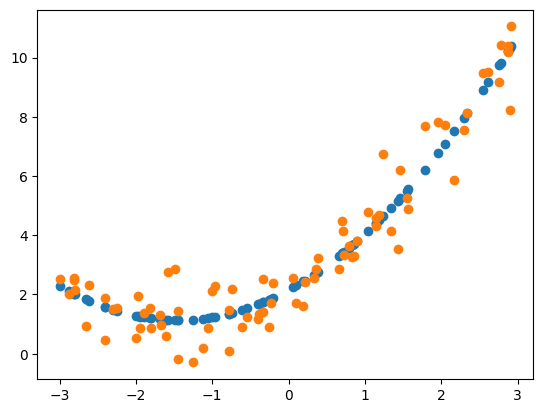

In [12]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

## using degree 3

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9032710915768876


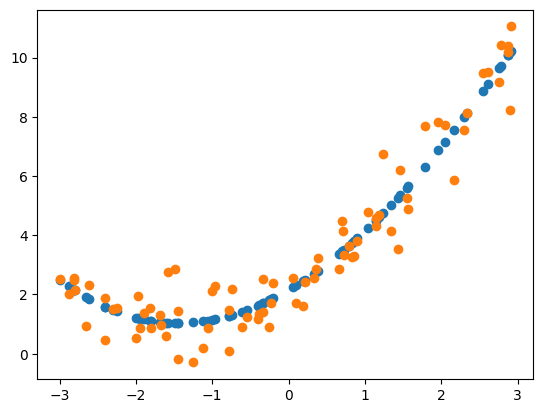

In [15]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

## prediction of new data

In [16]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

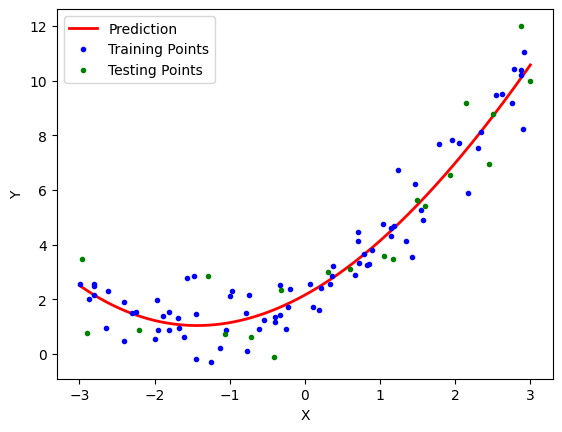

In [17]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Prediction")
plt.plot(X_train, y_train, "b.", label="Training Points")
plt.plot(X_test, y_test, "g.", label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [29]:
from sklearn.pipeline import Pipeline
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label="Degree" + str(degree), linewidth=3)
    plt.plot(X_train, y_train, "b.")
    plt.plot(X_test, y_test, "g.")
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4, 4, 0, 10])    #sets x-axis range from -4 to 4 and y-axis range from 0 to 10
    plt.show()

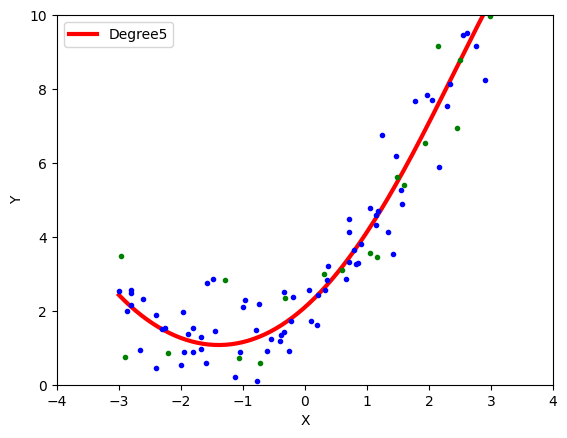

In [30]:
poly_regression(5)